Re: 1178.92550438441
摩擦系数: 0.05428672105403162
流速: 0.07859503362562734
Re: 2357.85100876882
摩擦系数: 3.1172393456286023
流速: 0.15719006725125467
Re: 3536.77651315323
摩擦系数: 3.1235934664841234
流速: 0.23578510087688204
Re: 4715.70201753764
摩擦系数: 0.1027637797568071
流速: 0.31438013450250935
Re: 5894.62752192205
摩擦系数: 0.10254265758797491
流速: 0.39297516812813665
Re: 7073.553026306459
摩擦系数: 0.1023951639984361
流速: 0.47157020175376396
Re: 8252.478530690869
摩擦系数: 0.10228977255816062
流速: 0.5501652353793913
Re: 9431.404035075278
摩擦系数: 0.10221070761139625
流速: 0.6287602690050186
Re: 10610.329539459692
摩擦系数: 0.1021491999443684
流速: 0.707355302630646
Re: 11789.2550438441
摩擦系数: 0.10209998578162645
流速: 0.7859503362562733
Re: 12968.180548228509
摩擦系数: 0.10205971432793912
流速: 0.8645453698819007
Re: 14147.106052612919
摩擦系数: 0.102026151118581
流速: 0.9431404035075279
Re: 15326.031556997328
摩擦系数: 0.10199774887380798
流速: 1.0217354371331553
Re: 16504.957061381738
摩擦系数: 0.10197340218873482
流速: 1.1003304707587827
Re: 17683

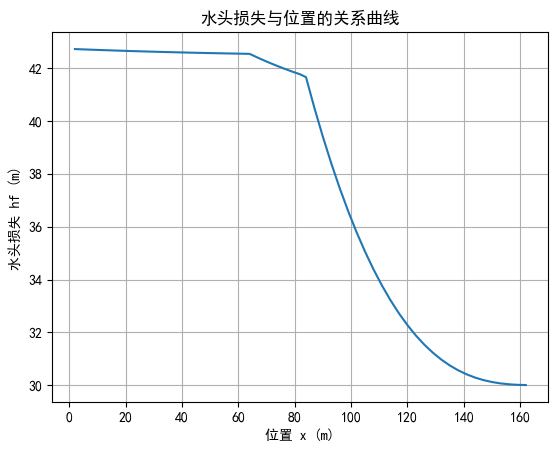

In [42]:
import matplotlib.pyplot as plt
# from matplotlib.font_manager import FontProperties
import numpy as np
# from io import BytesIO
# from fontTools.ttLib import TTFont
# import requests
import math
# Constants
Qd = 50*0.001 / 3600  # converting l/h to m³/s
rho = 1000  # density of water in kg/m³
g = 9.81  # acceleration due to gravity in m/s²

# Pipe dimensions
D1 = 15 / 1000  # diameter of first pipe in meters
L1 = 80  # length of first pipe in meters
D2 = 25 / 1000  # diameter of second pipe in meters
L2 = 20  # length of second pipe in meters
D3 = 50 / 1000  # diameter of third pipe in meters
L3 = 60  # length of third pipe in meters
L = 3  # distance between micro-sprinklers in meters
Hd=30
# Calculate number of sprinklers in each pipe segment
num_sprinklers_1 = L1 // L+1
num_sprinklers_2 = L2 // L
num_sprinklers_3 = L3 // L


def calculate_friction_factor(reynolds, roughness, diameter):
    # 初始猜测值
    f = 0.01
    
    # 定义误差容忍度
    error_tolerance = 1e-6
    
    # 最大迭代次数
    max_iterations = 1000
    
    # 迭代计数器
    iterations = 0
    
    # 判断是否为光滑管
    if roughness == 0:
        # 对于光滑管，采用经验公式
        f = 0.079 * math.pow(reynolds, -0.25)
    # 层流
    elif reynolds < 2300:
        f = 64 / reynolds
    # 湍流
    elif reynolds > 4000:
        # 计算相对粗糙度
        epsilon_over_d = roughness / diameter
        f = 1 / (2 * math.log10(epsilon_over_d / 3.7 + 2.51 / reynolds)) ** 2
    # 过渡区
    else:
        # 迭代求解摩擦因子
        while iterations < max_iterations:
            f1 = -2 * math.log10((roughness / (3.7 * diameter)) + (2.51 / (reynolds * math.sqrt(f))))
            df = f1 - f
            f = f1
            
            if abs(df) < error_tolerance:
                break
            
            iterations += 1
    
    return f
# 示例调用
# reynolds = 5000  # 示例雷诺数

# diameter = 0.025  # 示例管径
# friction_factor = calculate_friction_factor(reynolds, roughness, diameter)
def calculate_darcy_weisbach(friction_factor, pipe_length, pipe_diameter, fluid_velocity):
    gravity = 9.81  # 重力加速度 (m/s^2)
    
    # 计算摩擦引起的压力头损失
    head_loss = friction_factor * (pipe_length / pipe_diameter) * (fluid_velocity ** 2) / (2 * gravity)
    
    return head_loss
# Function to calculate head loss
def head_loss(D, L, Q):
    roughness = 0.0015  # 示例管壁粗糙度
    c_factor=140
    # formula="darcy-weisbach"
    formula="hazen-williams"

    A = np.pi * (D / 2) ** 2  # cross-sectional area
    v = Q / A  # flow velocity
    # Re = (rho * v * D) / 1.13  # Reynolds number (approximation for turbulent flow)
    Re = (1000 * v * D) / 0.001
    # f = 0.316 / Re ** 0.25  # friction factor
    f=calculate_friction_factor(Re, roughness, D)
    print(f"Re: {Re}")
    print(f"摩擦系数: {f}")
    print(f"流速: {v}")
    if formula=="darcy-weisbach":
       
        headloss=calculate_darcy_weisbach(f, L, D, v)
    elif  formula=="hazen-williams":
    #  计算水头损失
        headloss = 10.67 * (Q ** 1.852) * (c_factor ** -1.852) * (D ** -4.87) * L
    # return head_loss
    return headloss #f * (L / D) * (v ** 2 / (2 * g))

# Position and head loss calculation
positions = []
head_losses = []
x_coord=[]
y_coord=[]
positions.append(0)
head_losses.append(0)
q=0
hf=0
n=0
# First pipe segment
for i in range(num_sprinklers_1 ):
    x = (i+1) * L
    # q=(i+1) * Qd
    q += Qd
    hf += head_loss(D1, L,q )
    positions.append(x)
    head_losses.append(hf)
    n +=1

# Second pipe segment
# q=q+(i+1) * Qd
for i in range(num_sprinklers_2 + 1):
    x = L1 + (i+1)  * L
    q += Qd
    hf += head_loss(D2,  L, q)
    positions.append(x)
    head_losses.append(hf)
    n +=1

# Third pipe segment
for i in range(num_sprinklers_3 + 1):
    x = L1 + L2 + (i+1)  * L
    # q=q+(i+1) * Qd
    q += Qd
    hf +=  head_loss(D3, L, q)
    positions.append(x)
    head_losses.append(hf)
    n +=1

for i in range(n ):
    x_coord.append((n)*L-positions.pop())
    y_coord.append(Hd+head_losses.pop())
    # y=head_losses.pop()

# 设置中文字体和负号正常显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

# Plotting the curve with Chinese font
plt.plot(x_coord, y_coord)
plt.xlabel('位置 x (m)')
plt.ylabel('水头损失 hf (m)')
plt.title('水头损失与位置的关系曲线')
plt.grid(True)
plt.show()
